<a href="https://colab.research.google.com/github/AJITHSIVAN/ADS-Assignment-1/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, precision_score


In [8]:

df = pd.read_csv('prices-split-adjusted.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492591 entries, 0 to 492590
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    492591 non-null  object 
 1   symbol  492591 non-null  object 
 2   open    492591 non-null  float64
 3   close   492591 non-null  float64
 4   low     492591 non-null  float64
 5   high    492591 non-null  float64
 6   volume  492591 non-null  float64
dtypes: float64(5), object(2)
memory usage: 26.3+ MB


In [10]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [11]:
df.describe()

,open,close,low,high,volume
count,492591.000000,492591.000000,492591.000000,492591.000000,4.925910e+05
mean,52.300209,52.323760,51.754344,52.843165,6.103073e+06
std,53.042692,53.068842,52.510542,53.576335,1.475778e+07
min,2.980000,3.020000,2.820000,3.200000,0.000000e+00
25%,26.969999,26.970000,26.650000,27.270000,1.287100e+06
50%,41.029999,41.049999,40.599998,41.450001,2.686600e+06
75%,61.610001,61.639999,61.000866,62.209999,5.723750e+06
max,1283.599976,1301.640015,1276.010010,1313.819946,8.596434e+08


In [12]:

df['date'] = pd.to_datetime(df['date'])


In [13]:
df['symbol'].unique().shape

(491,)

In [14]:

df['symbol'].value_counts()

symbol
KMB     1038
MSI     1038
MRO     1038
MRK     1038
MOS     1038
        ... 
MNK      170
NWS      168
NWSA     168
EVHC     129
ALLE      62
Name: count, Length: 491, dtype: int64

In [15]:
label_encoding = LabelEncoder()
df['symbol'] = label_encoding.fit_transform(df['symbol'])

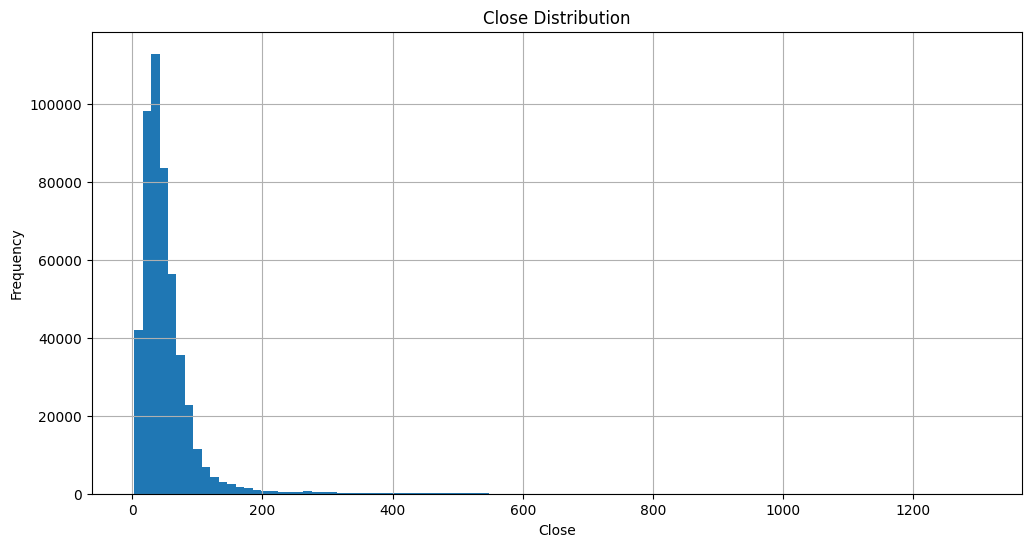

In [16]:
plt.figure(figsize=(12, 6))
df['close'].hist(bins=100)
plt.xlabel('Close')
plt.ylabel('Frequency')
plt.title('Close Distribution')
plt.show()

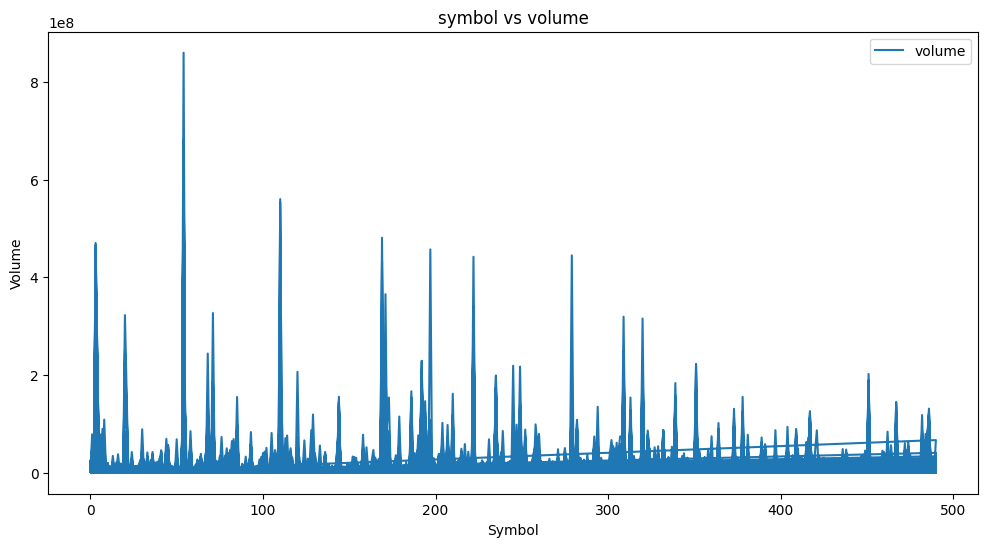

In [17]:
df.plot(x='symbol', y='volume', figsize=(12, 6), title='symbol vs volume')
plt.xlabel('Symbol')
plt.ylabel('Volume')
plt.show()

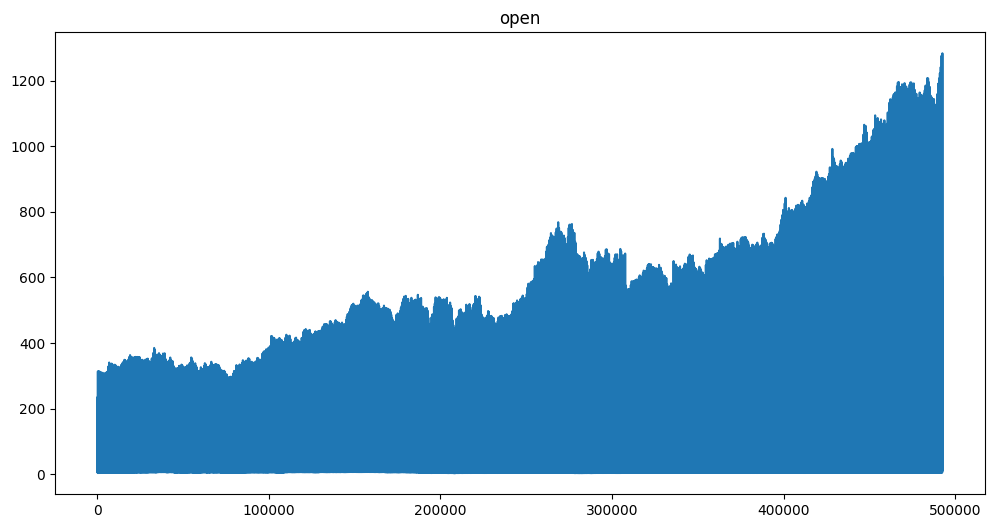

In [18]:
df['open'].plot(kind='line', figsize=(12, 6), title='open')
plt.gca().spines[['top', 'right']].set_visible(True)
plt.show()

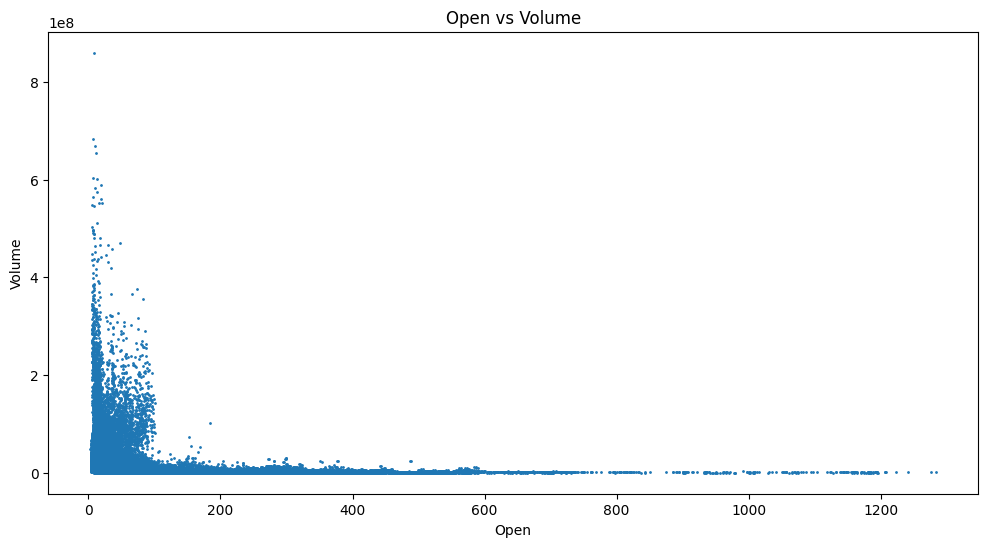

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(df['open'], df['volume'], s=1)
plt.xlabel('Open')
plt.ylabel('Volume')
plt.title('Open vs Volume')
plt.show()

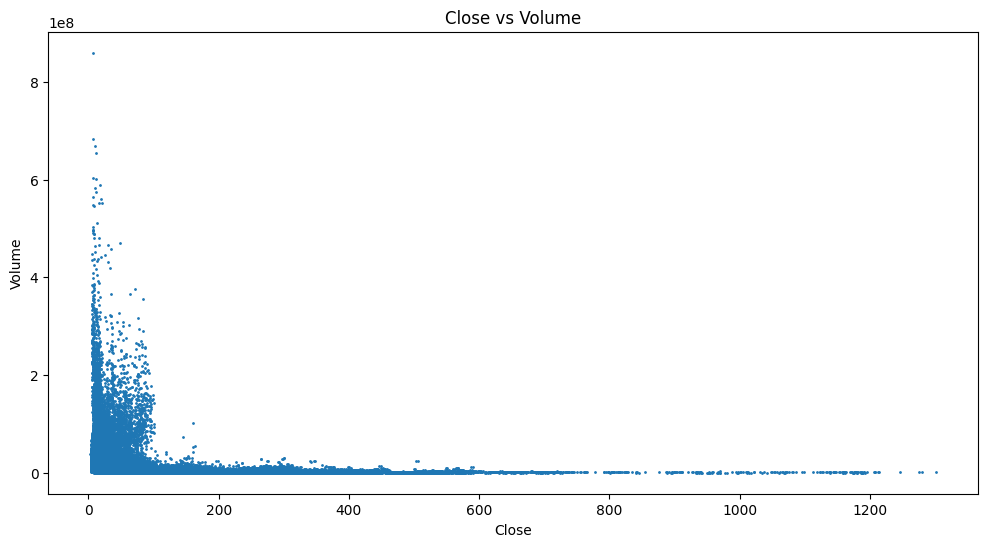

In [20]:

plt.figure(figsize=(12, 6))
plt.scatter(df['close'], df['volume'], s=1)
plt.xlabel('Close')
plt.ylabel('Volume')
plt.title('Close vs Volume')
plt.show()

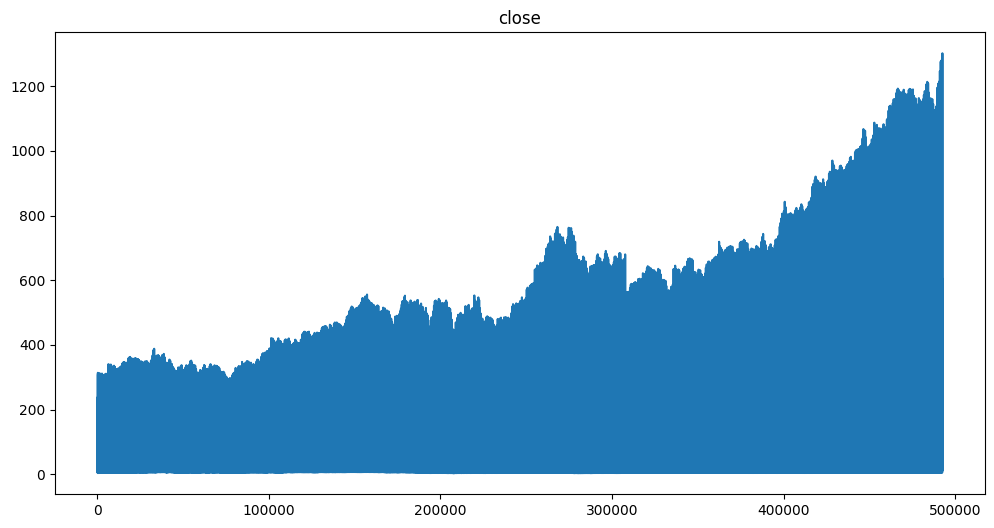

In [21]:
df['close'].plot(kind='line', figsize=(12, 6), title='close')
plt.gca().spines[['top', 'right']].set_visible(True)
plt.show()

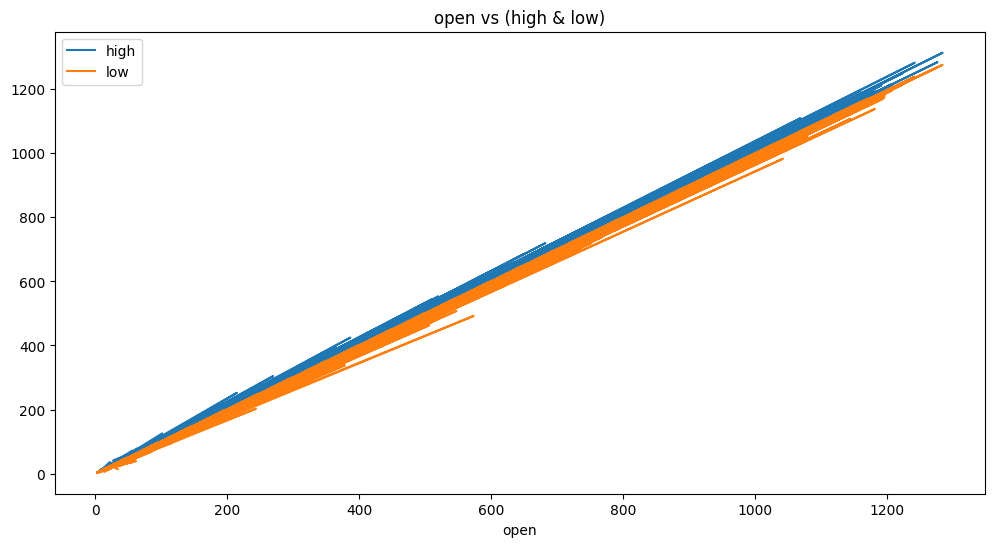

In [22]:
df.plot(x='open', y=['high','low'], figsize=(12, 6), title='open vs (high & low)')
plt.show()

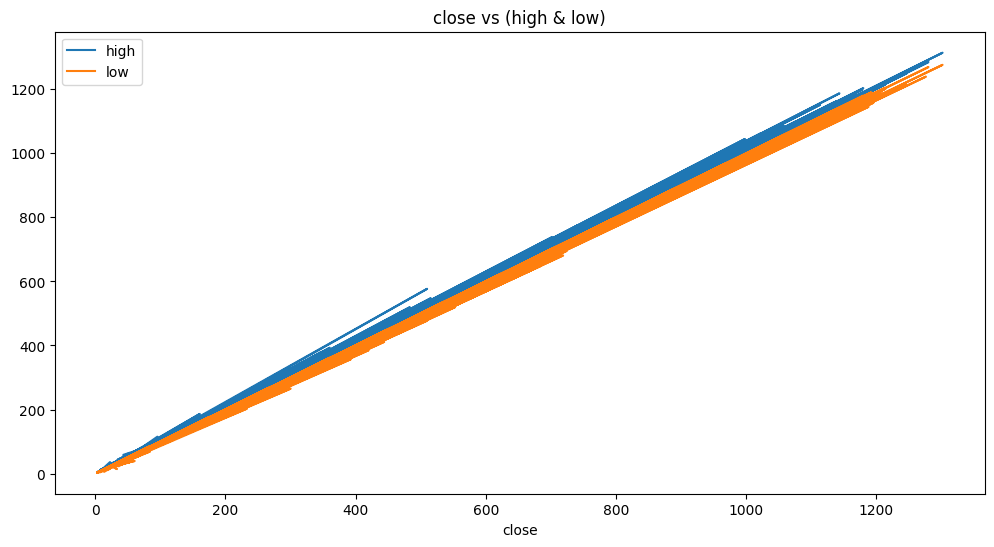

In [23]:
df.plot(x='close', y=['high','low'], figsize=(12, 6), title='close vs (high & low)')
plt.show()

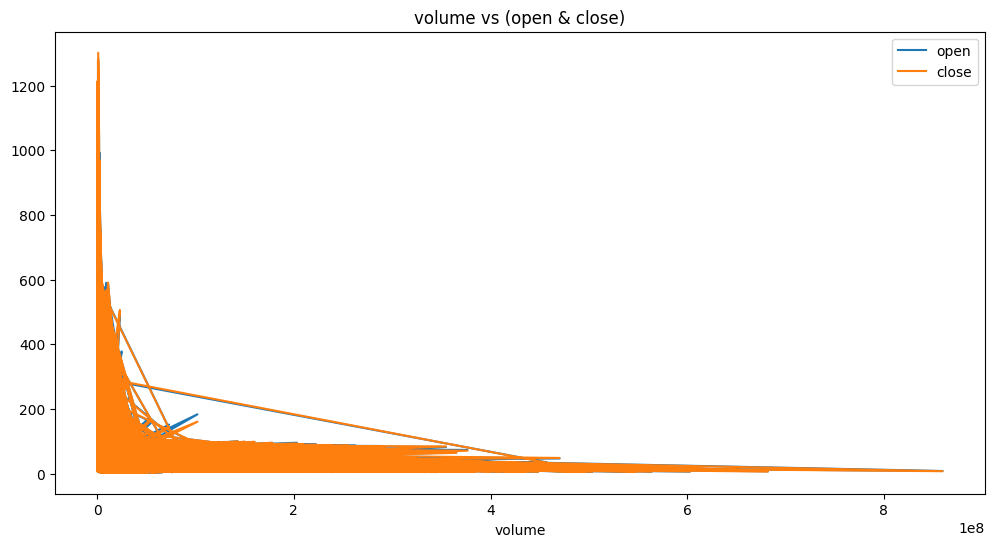

In [24]:

df.plot(x='volume', y=['open','close'], figsize=(12, 6), title='volume vs (open & close)')
plt.show()

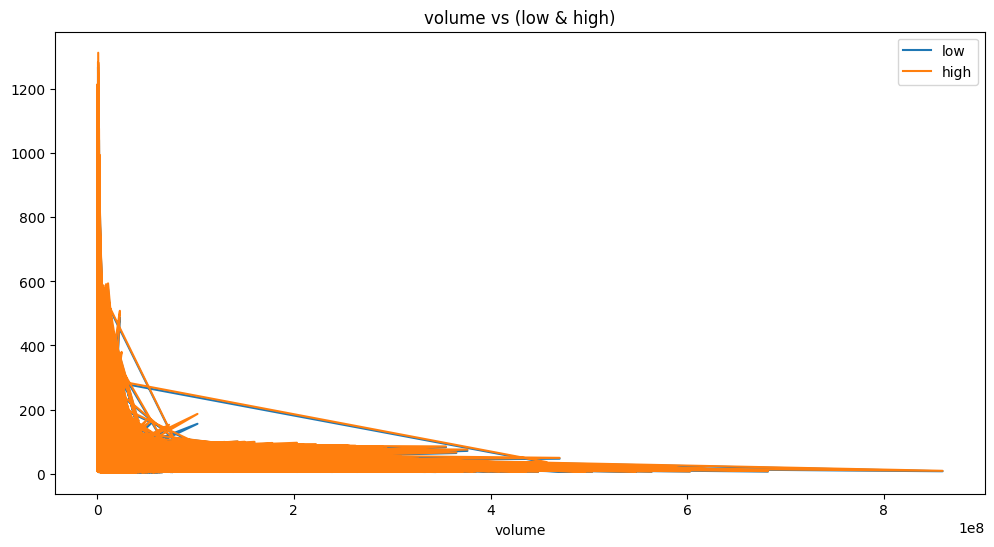

In [25]:

df.plot(x='volume', y=['low','high'], figsize=(12, 6), title='volume vs (low & high)')
plt.show()

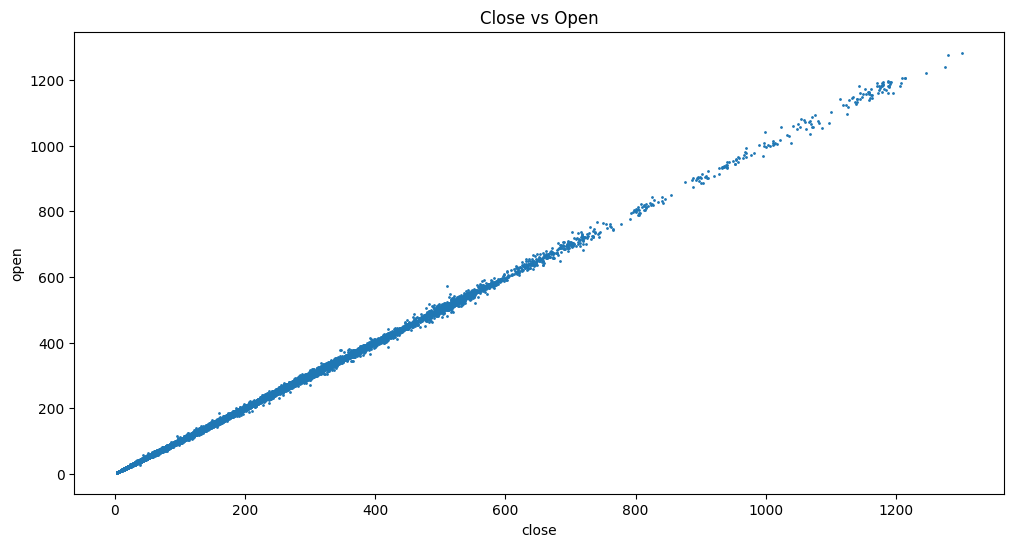

In [26]:
df.plot(x='close', y='open',  kind='scatter', figsize=(12, 6), title='Close vs Open', s=1)
plt.show()

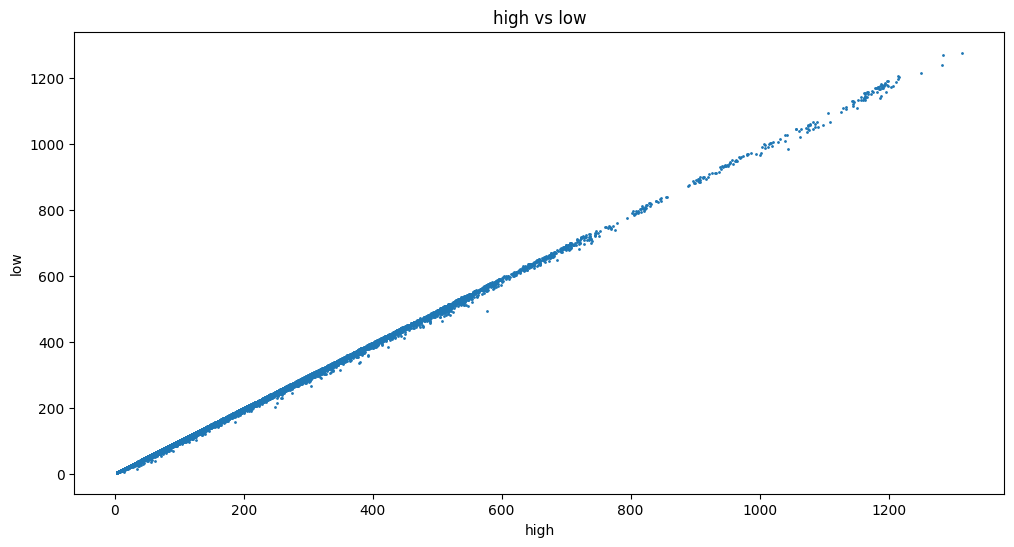

In [27]:
df.plot(x='high', y='low',  kind='scatter', figsize=(12, 6), title='high vs low',s=1)
plt.show()

<Axes: >

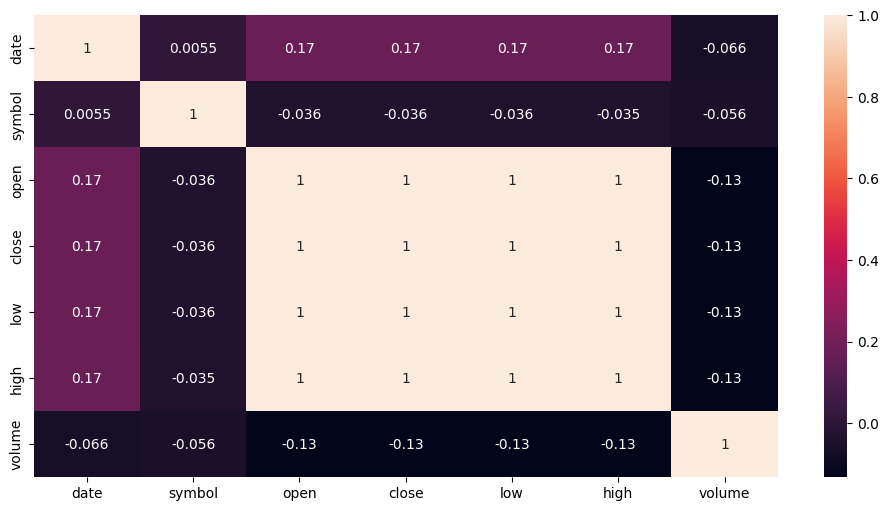

In [28]:
plt.figure(figsize=(12, 6))
cormap = df.corr()
sns.heatmap(cormap, annot = True)

In [29]:
x=df[['open','high','low','volume','symbol']]
y=df['close']

In [30]:

x

,open,high,low,volume,symbol
0,123.430000,126.250000,122.309998,2163600.0,470
1,125.239998,125.540001,119.940002,2386400.0,470
2,116.379997,119.739998,114.930000,2489500.0,470
3,115.480003,117.440002,113.500000,2006300.0,470
4,117.010002,117.330002,114.089996,1408600.0,470
...,...,...,...,...,...
492586,33.639999,34.119999,33.549999,1290500.0,444
492587,90.120002,90.199997,88.665001,5751200.0,445
492588,97.150002,97.910004,96.180000,3037500.0,446
492589,35.029999,36.389999,35.029999,2086800.0,447


In [31]:

y

0         125.839996
1         119.980003
2         114.949997
3         116.620003
4         114.970001
             ...    
492586     33.880001
492587     89.150002
492588     96.489998
492589     36.310001
492590     85.110001
Name: close, Length: 492591, dtype: float64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [33]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred_lr = lr_model.predict(x_test)

In [35]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)*100
rmse_lr = np.sqrt(mse_lr)
mse_lr, mae_lr, r2_lr, rmse_lr

(0.20896552139403804,
 0.2430160906510081,
 99.99288107774534,
 0.45712746733710724)

In [36]:
lr_acc = lr_model.score(x_test, y_test)*100
lr_acc

99.99288107774534